In [29]:
#importing libraries needed
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from tensorflow.keras.utils import to_categorical

#loading dataset
(X_train,y_train),(X_test, y_test)=cifar10.load_data()

#normalizing data
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

#converting class vectors to binary class matrices
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

#modelling
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

#compilation of model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 32)        18464     
                                                      

In [30]:
#model training
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 191s 121ms/step - loss: 1.5522 - accuracy: 0.4281 - val_loss: 1.2268 - val_accuracy: 0.5606
Epoch 2/15
1563/1563 [==============================] - 183s 117ms/step - loss: 1.2075 - accuracy: 0.5705 - val_loss: 1.0785 - val_accuracy: 0.6131
Epoch 3/15
1563/1563 [==============================] - 187s 119ms/step - loss: 1.0604 - accuracy: 0.6226 - val_loss: 0.9139 - val_accuracy: 0.6862
Epoch 4/15
1563/1563 [==============================] - 189s 121ms/step - loss: 0.9713 - accuracy: 0.6576 - val_loss: 0.8907 - val_accuracy: 0.6928
Epoch 5/15
1563/1563 [==============================] - 185s 118ms/step - loss: 0.9046 - accuracy: 0.6796 - val_loss: 0.7968 - val_accuracy: 0.7251
Epoch 6/15
1563/1563 [==============================] - 185s 118ms/step - loss: 0.8600 - accuracy: 0.6981 - val_loss: 0.7720 - val_accuracy: 0.7314
Epoch 7/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8247 - accuracy: 0.7106 - val_

Saving bird.png to bird.png


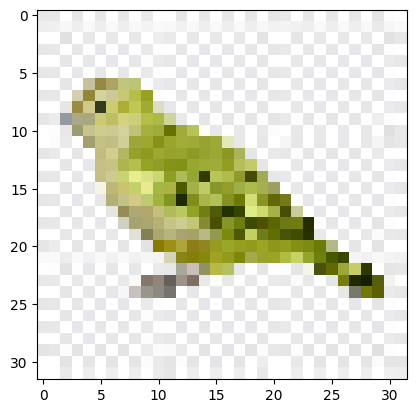

In [40]:
#saving the neural network architecture
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

#saving the trained neural network weights
model.save_weights("model_weight.h5")

#making predictions on the images
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

#loading the json files containing model structure
f=Path("model_structure.json")
model_structure=f.read_text()
model=model_from_json(model_structure)
model.load_weights("model_weight.h5")

#loading an image file to test
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

#to upload "dog.png" file on google colab
from google.colab import files
uploaded=files.upload()
img=load_img("bird.png",target_size=(32,32))
plt.imshow(img)

In [41]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)
list_of_images=np.expand_dims(image_to_test,axis=0)

#making predictions on model
results=model.predict(list_of_images)
single_result=results[0]

#checking the likelihood score of a class and most likely class's score
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]
class_label=class_labels[most_likely_class_index]
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

1/1 [==============================] - 0s 108ms/step
This is a image is a Bird likelihood: 1.000000
